In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-price-dataset-of-india/House Price India.csv


In [6]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from operator import itemgetter
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import (GradientBoostingRegressor, GradientBoostingClassifier)
import xgboost

In [8]:
data = pd.read_csv('/kaggle/input/house-price-dataset-of-india/House Price India.csv')

In [9]:
data

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


In [10]:
from sklearn.model_selection import train_test_split

In [12]:
data

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


In [13]:
import pandas as pd

In [18]:
from sklearn import datasets,linear_model

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('/kaggle/input/house-price-dataset-of-india/House Price India.csv')
df.drop(['id','Date'], axis=1, inplace=True)
df.head()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,5,2.50,3650,9050,2.0,0,4,5,10,3370,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,4,2.50,2920,4000,1.5,0,0,5,8,1910,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,5,2.75,2910,9480,1.5,0,0,3,8,2910,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,4,2.50,3310,42998,2.0,0,0,3,9,3310,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,3,2.00,2710,4500,1.5,0,0,4,8,1880,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   number of bedrooms                     14620 non-null  int64  
 1   number of bathrooms                    14620 non-null  float64
 2   living area                            14620 non-null  int64  
 3   lot area                               14620 non-null  int64  
 4   number of floors                       14620 non-null  float64
 5   waterfront present                     14620 non-null  int64  
 6   number of views                        14620 non-null  int64  
 7   condition of the house                 14620 non-null  int64  
 8   grade of the house                     14620 non-null  int64  
 9   Area of the house(excluding basement)  14620 non-null  int64  
 10  Area of the basement                   14620 non-null  int64  
 11  Bu

In [24]:
df.isna().sum()

number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int64

In [25]:
X = df.drop('Price', axis=1)
y = df['Price']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [28]:
print(f'\n shape of X_train - {X_train.shape}\n')
print(f' shape of X_test - {X_test.shape}\n')
print(f' shape of y_train - {y_train.shape}\n')
print(f' shape of y_test - {y_test.shape}\n')


 shape of X_train - (11696, 20)

 shape of X_test - (2924, 20)

 shape of y_train - (11696,)

 shape of y_test - (2924,)



In [29]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [30]:
number_of_features = len(X.columns)

model = Sequential()

model.add(layer=Input(shape=number_of_features))

model.add(layer=Dense(units=32, activation='relu'))

model.add(layer=Dense(units=64, activation='relu'))

model.add(layer=Dense(units=128, activation='relu'))

model.add(layer=Dense(units=256, activation='relu'))

model.add(layer=Dense(units=512, activation='relu'))

model.add(layer=Dense(units=1024, activation='relu'))

model.add(layer=Dense(units=2048, activation='relu'))

model.add(layer=Dense(units=256, activation='relu'))

model.add(layer=Dense(units=128, activation='relu'))

model.add(layer=Dense(units=64, activation='relu'))

model.add(layer=Dense(units=32, activation='relu'))

model.add(layer=Dense(units=16, activation='relu'))

model.add(layer=Dense(units=1, activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                672       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 dense_4 (Dense)             (None, 512)               131584    
                                                                 
 dense_5 (Dense)             (None, 1024)              525312    
                                                                 
 dense_6 (Dense)             (None, 2048)              2

In [31]:
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mape'])

In [35]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
366/366 [==============================] - 13s 36ms/step - loss: 46119702528.0000 - mae: 144287.9219 - mape: 30.1660
Epoch 2/100
366/366 [==============================] - 13s 35ms/step - loss: 46044643328.0000 - mae: 144437.0000 - mape: 30.2837
Epoch 3/100
366/366 [==============================] - 13s 35ms/step - loss: 46972141568.0000 - mae: 145803.8281 - mape: 30.4493
Epoch 4/100
366/366 [==============================] - 13s 36ms/step - loss: 46035898368.0000 - mae: 144146.7188 - mape: 30.1558
Epoch 5/100
366/366 [==============================] - 13s 35ms/step - loss: 46009286656.0000 - mae: 144572.5156 - mape: 30.2003
Epoch 6/100
366/366 [==============================] - 13s 35ms/step - loss: 47384981504.0000 - mae: 145262.0156 - mape: 30.2865
Epoch 7/100
366/366 [==============================] - 13s 34ms/step - loss: 47647531008.0000 - mae: 146306.3125 - mape: 30.5910
Epoch 8/100
366/366 [==============================] - 12s 34ms/step - loss: 45979451392.0000 - m

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



366/366 [==============================] - 13s 35ms/step - loss: 43155120128.0000 - mae: 140072.1719 - mape: 29.4729
Epoch 64/100
366/366 [==============================] - 13s 34ms/step - loss: 43371982848.0000 - mae: 141052.1875 - mape: 29.6815
Epoch 65/100
366/366 [==============================] - 12s 34ms/step - loss: 42535993344.0000 - mae: 139632.6875 - mape: 29.5536
Epoch 66/100
366/366 [==============================] - 13s 37ms/step - loss: 42858975232.0000 - mae: 140212.1406 - mape: 29.5599
Epoch 67/100
366/366 [==============================] - 13s 35ms/step - loss: 43841695744.0000 - mae: 142094.5312 - mape: 29.9651
Epoch 68/100
366/366 [==============================] - 13s 35ms/step - loss: 41656954880.0000 - mae: 138292.2031 - mape: 29.2917
Epoch 69/100
366/366 [==============================] - 12s 34ms/step - loss: 43415523328.0000 - mae: 140823.7188 - mape: 29.7306
Epoch 75/100
366/366 [==============================] - 13s 35ms/step - loss: 44051394560.0000 - mae: 1

In [36]:
y_pred = model.predict(X_test)

92/92 [==============================] - 1s 6ms/step


In [37]:
y_pred

array([[302697.62],
       [361873.12],
       [304292.84],
       ...,
       [374249.12],
       [268646.6 ],
       [362559.4 ]], dtype=float32)

In [38]:
y_test

12149    640000
13581    650000
11595    325000
2769     373000
7393     355000
          ...  
7362     497000
11132    400000
142      366750
1405     276000
6184     569000
Name: Price, Length: 2924, dtype: int64

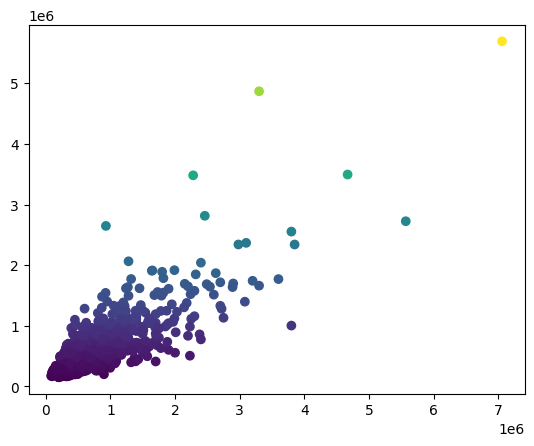

In [39]:
plt.scatter(y_test, y_pred, c=y_pred)
plt.show()

In [40]:
pd.DataFrame({'Actual Value':y_test.values.flatten(), 'Predicted Value':y_pred.flatten()})

,Actual Value,Predicted Value
0,640000,302697.62500
1,650000,361873.12500
2,325000,304292.84375
3,373000,399172.28125
4,355000,432058.43750
...,...,...
2919,497000,484647.71875
2920,400000,304131.00000
2921,366750,374249.12500
2922,276000,268646.59375


In [41]:
r2_score(y_pred=y_pred, y_true=y_test) * 100

60.36812671903618